In [1]:
import numpy as np
from astropy.io import fits
from astropy.wcs import WCS
import astropy.units as u
from spectral_cube import SpectralCube
import matplotlib.pyplot as plt
import regions

import sys
sys.path.append('../')
from NOEMAsetup import *

### C18O to H2CO fitted cube wcs

The cell below masks the C18O cube to sum up only where there is H2CO emission. We discussed and this is not the correct approach

In [ ]:
filenameH2CO = '../H2CO/CDconfigsmall/Per-emb-50_CD_l021l060_uvsub_H2CO_multi_small_fitcube'
filenameC18O = '../' + C18O_2_1

cubeH2CO = SpectralCube.read(filenameH2CO+'.fits').with_spectral_unit(u.km/u.s)
cubeC18O = SpectralCube.read(filenameC18O+'.fits').with_spectral_unit(u.km/u.s)
spectral_grid_objective = cubeH2CO.spectral_axis
# spectral reprojection
cubeC18O = cubeC18O.spectral_interpolate(spectral_grid_objective)
# spatial reprojection
cubeC18O = cubeC18O.reproject(cubeH2CO.header) #beam is still there
cubeC18O.write(filenameC18O+'_reprojectH2COs.fits')

# Now leave out all that is not streamer

# mask the cube where there is emission
masked_cube = cubeC18O.with_mask(cubeH2CO > snratio* rms)
region_streamer = '../data/region_streamer_l.reg'
regio = regions.read_ds9(region_streamer)
streamer_cube = masked_cube.subcube_from_regions(regio)
streamer_cube.write(filenameC18O+'_H2COmasked_'+str(snratio)+'sigma.fits')


Testing that the conversions went well...

In [2]:
fitcube_region = 'analysis/H2CO_fitregion.reg'

cubeH2COfile = 'H2CO/CDconfig/Per-emb-50_CD_l021l060_uvsub_H2CO_multi'
cubeH2CO_sfile = 'H2CO/CDconfigsmall/Per-emb-50_CD_l021l060_uvsub_H2CO_multi_small'
cubeH2CO_ffile = 'H2CO/CDconfigsmall/Per-emb-50_CD_l021l060_uvsub_H2CO_multi_small_fitcube'

cubeH2CO = SpectralCube.read(cubeH2COfile+'.fits')
cubeH2CO_s = SpectralCube.read(cubeH2CO_sfile+'.fits')
cubeH2CO_f = SpectralCube.read(cubeH2CO_ffile+'.fits')

In [26]:
spectra_regions_file = 'H2CO/CDconfig/spectra_regs_test.reg'
spectra_regions = regions.read_ds9(spectra_regions_file)
specreg = spectra_regions[0]
spectra_subcube = cubeH2CO.subcube_from_regions([specreg])
spectrum = spectra_subcube.mean(axis=(1, 2))
  

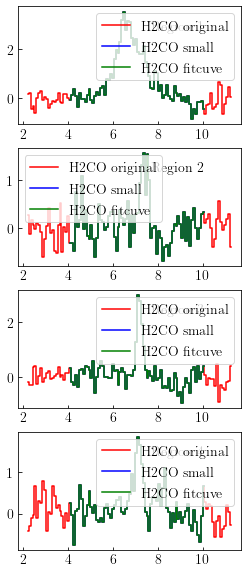

In [3]:
spectra_regions_file = 'H2CO/CDconfig/spectra_regs_test.reg'
spectra_regions = regions.read_ds9(spectra_regions_file)

fig, axs = plt.subplots(4, 1, figsize = (4,10))
for specreg, ax, i in zip(spectra_regions, axs, range(len(spectra_regions))):
  spectra_subcube = cubeH2CO.subcube_from_regions([specreg]).with_spectral_unit(u.km/u.s)
  velocity = spectra_subcube.spectral_axis
  spectrum = (spectra_subcube.to(u.K)).mean(axis=(1, 2))
  spectrum = spectrum.to(u.K)
  ax.plot(velocity, spectrum, 'r', drawstyle='steps-mid', label='H2CO original')
  
  spectra_subcube2 = cubeH2CO_s.subcube_from_regions([specreg]).with_spectral_unit(u.km/u.s)
  velocity2 = spectra_subcube2.spectral_axis
  spectrum2 = (spectra_subcube2.to(u.K)).mean(axis=(1, 2))
  spectrum2 = spectrum2.to(u.K)
  ax.plot(velocity2, spectrum2, 'b', drawstyle='steps-mid', label='H2CO small')
  
  spectra_subcube3 = cubeH2CO_f.subcube_from_regions([specreg]).with_spectral_unit(u.km/u.s)
  velocity3 = spectra_subcube3.spectral_axis
  spectrum3 = (spectra_subcube3.to(u.K)).mean(axis=(1, 2))
  spectrum3 = spectrum3.to(u.K)
  ax.plot(velocity3, spectrum3, 'g', drawstyle='steps-mid', label='H2CO fitcuve')
  ax.legend()
  
  ax.annotate("Region {}".format(i+1), (0.6, 0.8), xycoords='axes fraction')
fig.savefig('H2CO_spectral_cube_check.png')

In [13]:
cubeC18Ofile = 'C18O/CDconfig/JEP/JEP_mask_multi_Per-emb-50_CD_l025l064_uvsub_C18O'
cubeC18O_ffile = 'C18O/CDconfig/JEP/JEP_mask_multi_Per-emb-50_CD_l025l064_uvsub_C18O_reprojectH2COs'
cubeC18O_stfile = 'C18O/CDconfig/JEP/JEP_mask_multi_Per-emb-50_CD_l025l064_uvsub_C18O_H2COmasked_1sigma_2'
cubeC18O = SpectralCube.read(cubeC18Ofile+'.fits')
cubeC18O_f = SpectralCube.read(cubeC18O_ffile+'.fits')
cubeC18O_st = SpectralCube.read(cubeC18O_stfile+'.fits')


/Users/mvaldivi/anaconda3/lib/python3.8/site-packages/spectral_cube/spectral_cube.py:440: RuntimeWarning: Mean of empty slice
  out = function(self._get_filled_data(fill=fill,
/Users/mvaldivi/anaconda3/lib/python3.8/site-packages/spectral_cube/spectral_cube.py:440: RuntimeWarning: Mean of empty slice
  out = function(self._get_filled_data(fill=fill,
/Users/mvaldivi/anaconda3/lib/python3.8/site-packages/spectral_cube/spectral_cube.py:440: RuntimeWarning: Mean of empty slice
  out = function(self._get_filled_data(fill=fill,


skip


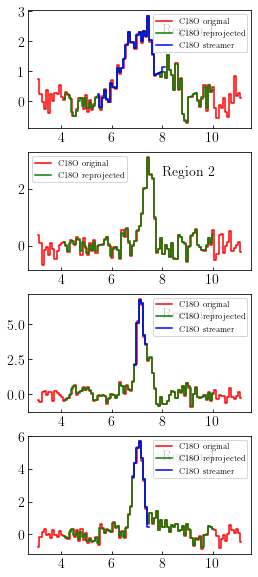

In [14]:
fig, axs = plt.subplots(4, 1, figsize = (4,10))
for specreg, ax, i in zip(spectra_regions, axs, range(len(spectra_regions))):
  spectra_subcube = cubeC18O.subcube_from_regions([specreg]).with_spectral_unit(u.km/u.s)
  velocity = spectra_subcube.spectral_axis
  spectrum = (spectra_subcube.to(u.K)).mean(axis=(1, 2))
  spectrum = spectrum.to(u.K)
  ax.plot(velocity, spectrum, 'r', drawstyle='steps-mid', label='C18O original')
 
 
  spectra_subcube3 = cubeC18O_f.subcube_from_regions([specreg]).with_spectral_unit(u.km/u.s)
  velocity3 = spectra_subcube3.spectral_axis
  spectrum3 = (spectra_subcube3.to(u.K)).mean(axis=(1, 2))
  spectrum3 = spectrum3
  ax.plot(velocity3, spectrum3, 'g', drawstyle='steps-mid', label='C18O reprojected')
  
  if i==1:
    print("skip")
  else:
    spectra_subcube2 = cubeC18O_st.subcube_from_regions([specreg]).with_spectral_unit(u.km/u.s)
    velocity2 = spectra_subcube2.spectral_axis
    spectrum2 = (spectra_subcube2.to(u.K)).mean(axis=(1, 2))
    ax.plot(velocity2, spectrum2, 'b', drawstyle='steps-mid', label='C18O streamer')
  ax.legend(fontsize=8)
  
  ax.annotate("Region {}".format(i+1), (0.6, 0.8), xycoords='axes fraction')
# fig.savefig('C18O_spectral_cube_reprojection_check1.png')

As this was not the correct approach (but at least in terms of unit conversions everything is in order), we decide to test 

First check that the C18O emission in the streamer have more or less the same shape

For this, we use the original H2Co and C18O cubes (no pbcor)

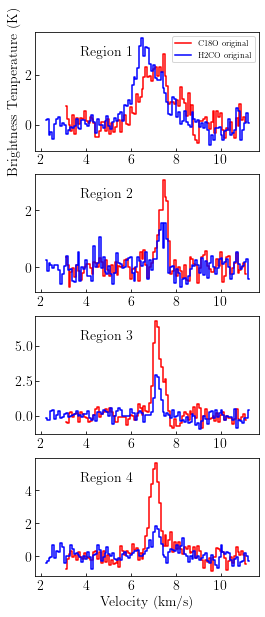

In [24]:
fig, axs = plt.subplots(4, 1, figsize = (4,10))
for specreg, ax, i in zip(spectra_regions, axs, range(len(spectra_regions))):
  spectra_subcube = cubeC18O.subcube_from_regions([specreg]).with_spectral_unit(u.km/u.s)
  velocity = spectra_subcube.spectral_axis
  spectrum = (spectra_subcube.to(u.K)).mean(axis=(1, 2))
  spectrum = spectrum.to(u.K)
  ax.plot(velocity, spectrum, 'r', drawstyle='steps-mid', label='C18O original')
  
  spectra_subcube2 = cubeH2CO.subcube_from_regions([specreg]).with_spectral_unit(u.km/u.s)
  velocity2 = spectra_subcube2.spectral_axis
  spectrum2 = (spectra_subcube2.to(u.K)).mean(axis=(1, 2))
  ax.plot(velocity2, spectrum2, 'b', drawstyle='steps-mid', label='H2CO original')
  
  if i==0:
    ax.legend(fontsize=8)
    ax.set_ylabel('Brightness Temperature (K)')
  ax.annotate("Region {}".format(i+1), (0.2, 0.8), xycoords='axes fraction')
    
  if i==3:
    ax.set_xlabel('Velocity (km/s)')
    
# fig.savefig('Comparison_H2CO_C18O.pdf', dpi=300, bbox_inches='tight')

Now, we reproject the C18O to the H2CO velocity grid (from the original cubes, the spatial grid is the same) and integrate the cube

In [6]:
filenameH2CO = 'H2CO/CDconfigsmall/Per-emb-50_CD_l021l060_uvsub_H2CO_multi_small'
filenameC18O = C18O_2_1 + '_pbcor'

cubeH2CO = SpectralCube.read(filenameH2CO+'.fits').with_spectral_unit(u.km/u.s)
cubeC18O = SpectralCube.read(filenameC18O+'.fits').with_spectral_unit(u.km/u.s)
spectral_grid_objective = cubeH2CO.spectral_axis
# spectral reprojection
cubeC18O = cubeC18O.spectral_interpolate(spectral_grid_objective)
# spatial reprojection
# cubeC18O = cubeC18O.reproject(cubeH2CO.header) # not necessary
cubeC18O.write(filenameC18O+'_reprojectH2COs.fits')


In [8]:
velinit = 5.5 * u.km/u.s
velend = 9.5 * u.km/u.s
region_streamer = 'data/region_streamer_l_kink.reg'
cubeC18O_ffile = 'C18O/CDconfig/JEP/JEP_mask_multi_Per-emb-50_CD_l025l064_uvsub_C18O_pbcor_reprojectH2COs'

# load the region and the cube between velinit and velend
regio = regions.read_ds9(region_streamer)
cube = SpectralCube.read(cubeC18O_ffile+'.fits').with_spectral_unit(u.km/u.s).spectral_slab(velinit, velend).to(u.K)
rms = 0.347 * u.K

# do a subcube using the region
subcube = cube.subcube_from_regions(regio)
# do the moment
mom0 = subcube.moment(order=0)
header = mom0.header
mom0.write(cubeC18O_ffile+'_mom0_l_kink.fits')



In [15]:
velinit = 5.5 * u.km/u.s
velend = 9.5 * u.km/u.s
region_streamer = 'data/region_streamer_l_kink.reg'
cubeC18O_ffile = 'C18O/CDconfig/JEP/JEP_mask_multi_Per-emb-50_CD_l025l064_uvsub_C18O_pbcor_reprojectH2COs'
regio = regions.read_ds9(region_streamer)
cube = SpectralCube.read(cubeC18O_ffile+'.fits').with_spectral_unit(u.km/u.s).spectral_slab(velinit, velend)
# cube = cube.subcube_from_regions(regio)

# cube.hdu.writeto(cubeC18O_ffile+'_l_kink.fits')

mom0 = cube.moment(order=0)
mom0.write(cubeC18O_ffile+'_mom0_test.fits')

In [6]:
velinit = 5.5 * u.km/u.s
velend = 9.5 * u.km/u.s
cubeC18O_ffile = 'C18O/CDconfig/JEP/JEP_mask_multi_Per-emb-50_CD_l025l064_uvsub_C18O_pbcor_reprojectH2COs'

# load the region and the cube between velinit and velend
regio = regions.read_ds9(region_streamer)
cube = SpectralCube.read(cubeC18O_ffile+'.fits').with_spectral_unit(u.km/u.s).spectral_slab(velinit, velend).to(u.K)

header = cube.header
beammaj = header['bmaj']*u.deg
beammin = header['bmin']*u.deg
fwhm_to_sigma = 1. / (8 * np.log(2))**0.5
omega_B = 1.133* beammaj * beammin
freq = header['restfrq'] * u.Hz

rms = (13.94*u.mJy/u.beam).to(u.K, u.brightness_temperature(freq, beam_area=omega_B))  
nchan = np.size(cube.spectral_axis)
rmsmom0 = rms * np.sqrt(nchan) * u.km/u.s
print(rms)
print(rmsmom0)

0.4032378595129648 K
2.7937138408471047 K km / s
